In [1]:
%store -r training_data
%store -r training_columns
%store -r mc_df
%store -r bkg_df
%store -r data_df

In [2]:
import mplhep
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from xgboost import XGBClassifier

In [3]:
def plot_comparision(var, mc_df, bkg_df):
    # create histograms
    hsig, bins = np.histogram(mc_df[var], bins=60, density=1)
    hbkg, bins = np.histogram(bkg_df[var], bins=bins, density=1)

    mplhep.histplot((hsig, bins), label='MC Signal', )
    mplhep.histplot(hbkg, bins=bins, label='Data Bkg')
    plt.xlabel(var)
    plt.xlim(bins[0], bins[-1])
    plt.legend(loc='best')


def plot_significance(bdt, training_data, training_columns, label=None):
    y_score = bdt.predict_proba(training_data[training_columns])[:, 1]
    fpr, tpr, thresholds = roc_curve(training_data['catagory'], y_score)

    n_sig = 1200
    n_bkg = 23000
    S = n_sig * tpr
    B = n_bkg * fpr
    metric = S / np.sqrt(S + B)

    plt.plot(thresholds, metric, label=label)
    plt.xlabel('BDT cut value')
    plt.ylabel('$\\frac{S}{\\sqrt{S+B}}$')
    plt.xlim(0, 1.0)

    optimal_cut = thresholds[np.argmax(metric)]
    plt.axvline(optimal_cut, color='black', linestyle='--')


def plot_roc(bdt, training_data, training_columns, label=None):
    y_score = bdt.predict_proba(training_data[training_columns])[:, 1]
    fpr, tpr, thresholds = roc_curve(training_data['catagory'], y_score)
    area = auc(fpr, tpr)

    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    if label:
        plt.plot(fpr, tpr, label=f'{label} (area = {area:.2f})')
    else:
        plt.plot(fpr, tpr, label=f'ROC curve (area = {area:.2f})')
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    # We can make the plot look nicer by forcing the grid to be square
    plt.gca().set_aspect('equal', adjustable='box')

In [4]:
# Train the Gradient Booster
bdt_1 = GradientBoostingClassifier(n_estimators=20)  # less estimator is faster, for demonstration, but 100-300 is usually better
bdt_1.fit(training_data[training_columns], training_data['catagory'])
for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT'] = bdt_1.predict_proba(df[training_columns])[:, 1]

In [5]:
# Train the Adaptive Booster
bdt_2 = AdaBoostClassifier(n_estimators=20)  # less estimator is faster, for demonstration, but 100-300 is usually better
bdt_2.fit(training_data[training_columns], training_data['catagory'])
for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT_2'] = bdt_2.predict_proba(df[training_columns])[:, 1]

/Users/thiagorangel/anaconda3/envs/ROOT/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [6]:
# Train XGBoost Classifier
xgboost_bdt = XGBClassifier(n_estimators=20)  # less estimator is faster, for demonstration, but 100-300 is usually better
xgboost_bdt.fit(training_data[training_columns], training_data['catagory'])
for df in [mc_df, bkg_df, data_df, training_data]:
    df['XGBoost_BDT'] = xgboost_bdt.predict_proba(df[training_columns])[:, 1]

/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_77915/2193470804.py:21: RuntimeWarning: invalid value encountered in divide
  metric = S / np.sqrt(S + B)
/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_77915/2193470804.py:21: RuntimeWarning: invalid value encountered in divide
  metric = S / np.sqrt(S + B)
/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_77915/2193470804.py:21: RuntimeWarning: invalid value encountered in divide
  metric = S / np.sqrt(S + B)


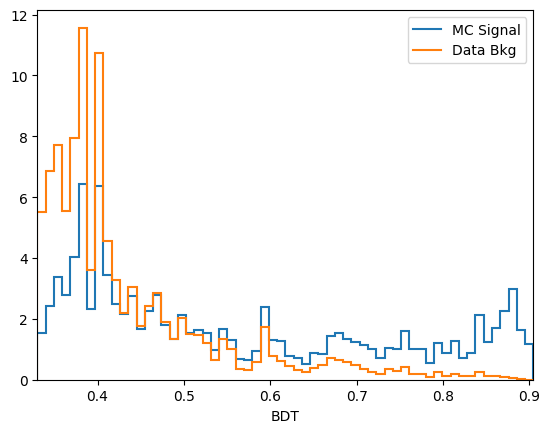

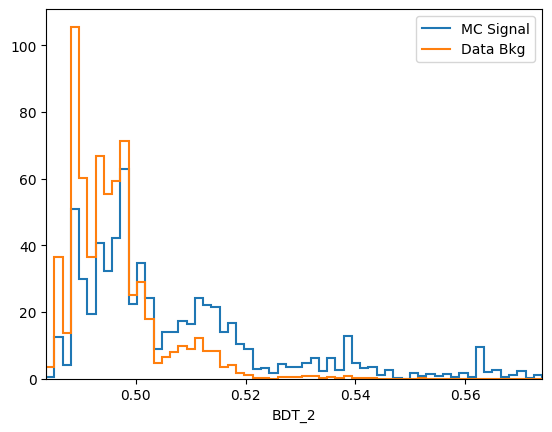

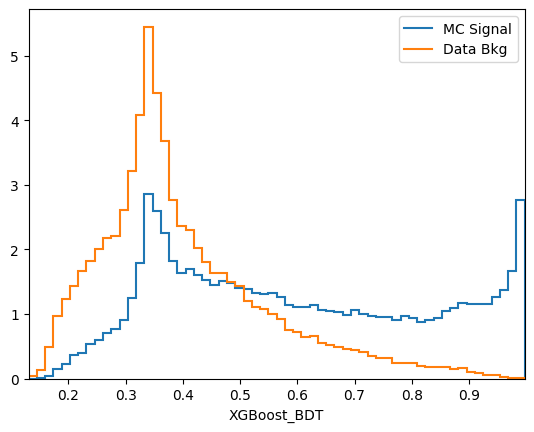

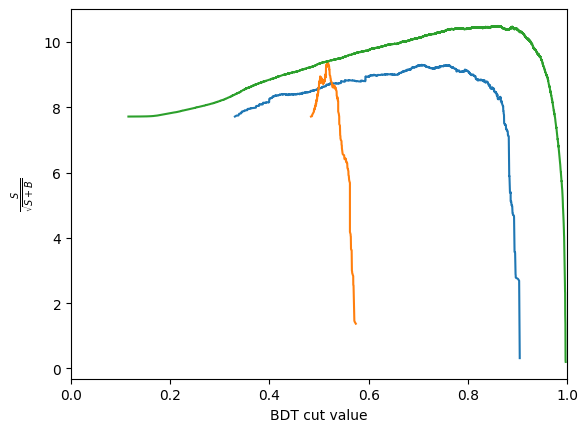

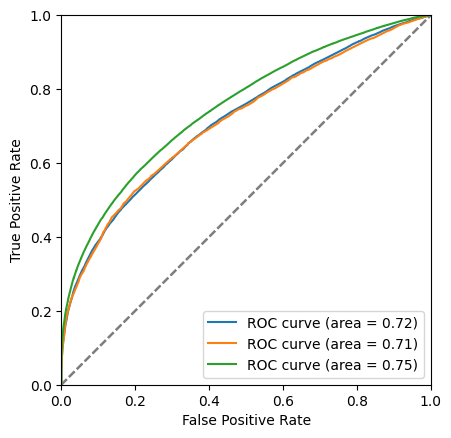

In [7]:
plt.figure()
plot_comparision('BDT', mc_df, bkg_df)
plt.figure()
plot_comparision('BDT_2', mc_df, bkg_df)
plt.figure()
plot_comparision('XGBoost_BDT', mc_df, bkg_df)

plt.figure()
for bdt in [bdt_1, bdt_2, xgboost_bdt]:
    plot_significance(bdt, training_data, training_columns)

plt.figure()
for bdt in [bdt_1, bdt_2, xgboost_bdt]:
    plot_roc(bdt, training_data, training_columns)

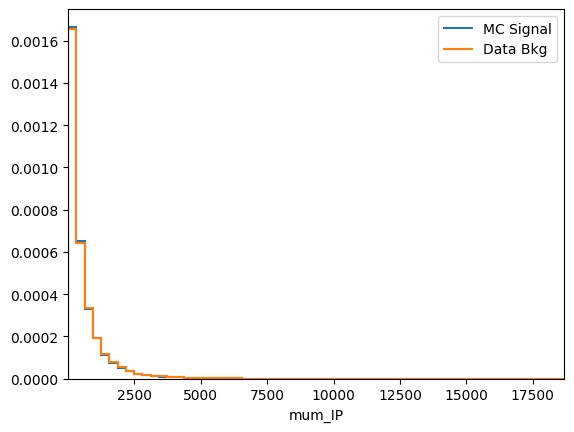

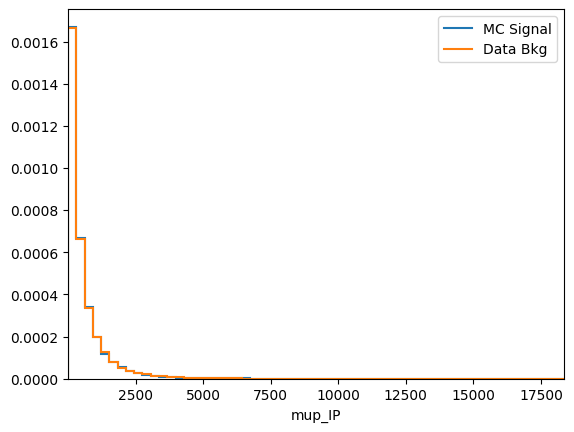

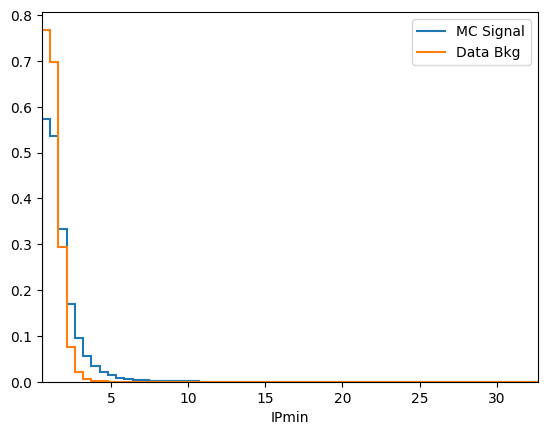

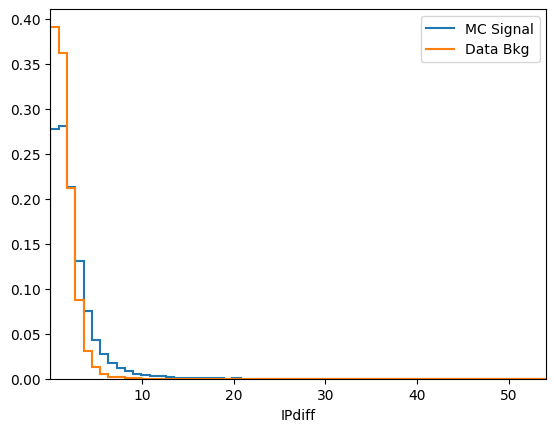

In [8]:
for df in [mc_df, bkg_df, data_df, training_data]:
    df['IPmin'] = np.min([df['mum_PT'], df['mup_PT']], axis=0)

for df in [mc_df, bkg_df, data_df, training_data]:
    df['IPdiff'] = np.abs(df['mum_PT'] - df['mup_PT'])

plt.figure()
plot_comparision('mum_IP', mc_df, bkg_df)

plt.figure()
plot_comparision('mup_IP', mc_df, bkg_df)

plt.figure()
plot_comparision('IPmin', mc_df, bkg_df)

plt.figure()
plot_comparision('IPdiff', mc_df, bkg_df)

/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_77915/2193470804.py:21: RuntimeWarning: invalid value encountered in divide
  metric = S / np.sqrt(S + B)
/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_77915/2193470804.py:21: RuntimeWarning: invalid value encountered in divide
  metric = S / np.sqrt(S + B)
/var/folders/kw/0czmm3990g5fnnpcxpc0ff_40000gn/T/ipykernel_77915/2193470804.py:21: RuntimeWarning: invalid value encountered in divide
  metric = S / np.sqrt(S + B)


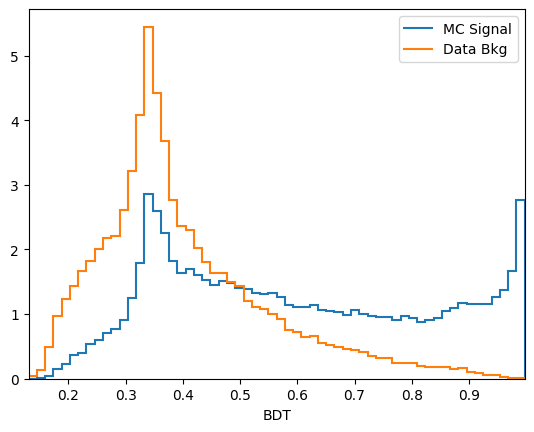

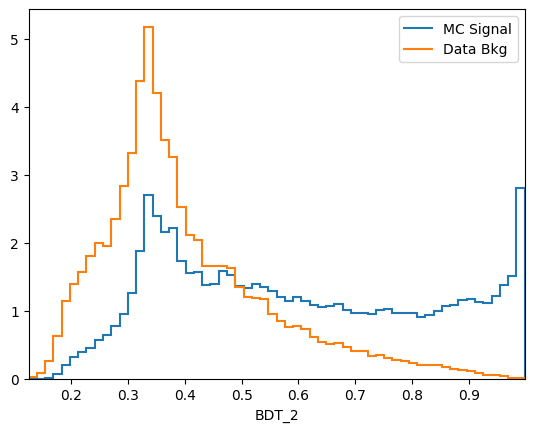

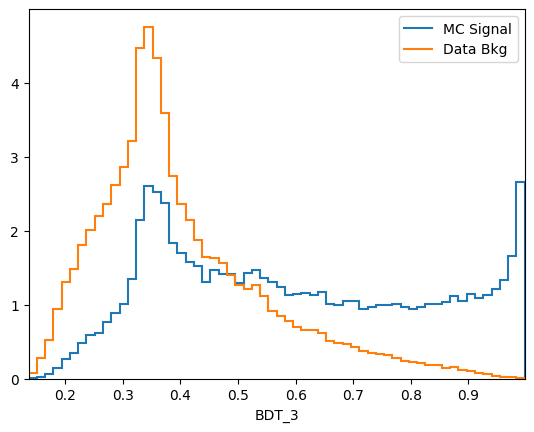

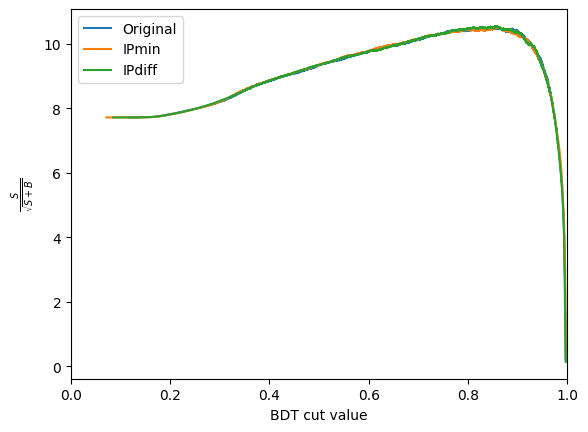

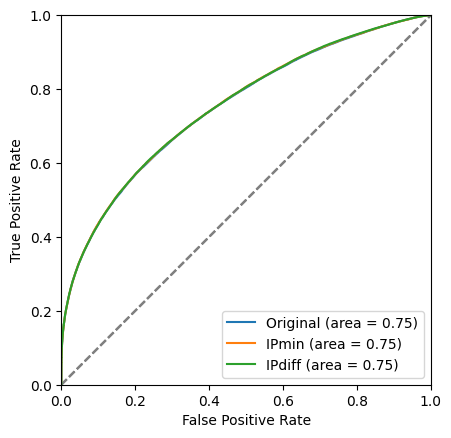

In [9]:
# bdtclass = GradientBoostingClassifier()
bdtclass = XGBClassifier  # we could also use this one
bdt_1 = bdtclass(n_estimators=20)  # less estimator is faster, for demonstration, but 100-300 is usually better
bdt_1.fit(training_data[training_columns], training_data['catagory'])
for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT'] = bdt_1.predict_proba(df[training_columns])[:, 1]

bdt_2 = bdtclass(n_estimators=20)  # less estimator is faster, for demonstration, but 100-300 is usually better
training_columns_2 = training_columns + ['IPmin']
bdt_2.fit(training_data[training_columns_2], training_data['catagory'])
for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT_2'] = bdt_2.predict_proba(df[training_columns_2])[:, 1]

bdt_3 = bdtclass(n_estimators=20)  # less estimator is faster, for demonstration, but 100-300 is usually better
training_columns_3 = training_columns + ['IPdiff']
bdt_3.fit(training_data[training_columns_3], training_data['catagory'])
for df in [mc_df, bkg_df, data_df, training_data]:
    df['BDT_3'] = bdt_3.predict_proba(df[training_columns_3])[:, 1]

plt.figure()
plot_comparision('BDT', mc_df, bkg_df)
plt.figure()
plot_comparision('BDT_2', mc_df, bkg_df)
plt.figure()
plot_comparision('BDT_3', mc_df, bkg_df)

plt.figure()
plot_significance(bdt_1, training_data, training_columns, label='Original')
plot_significance(bdt_2, training_data, training_columns_2, label='IPmin')
plot_significance(bdt_3, training_data, training_columns_3, label='IPdiff')
plt.legend()

plt.figure()
plot_roc(bdt_1, training_data, training_columns, label='Original')
plot_roc(bdt_2, training_data, training_columns_2, label='IPmin')
plot_roc(bdt_3, training_data, training_columns_3, label='IPdiff')
plt.legend()